In [338]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
import pyfolio as pf
import empyrical
from pathlib import Path
from dotenv import load_dotenv
from datetime import datetime
import plotly.graph_objects as go
%config Completer.use_jedi = False
import requests
import seaborn as sns

In [339]:
load_dotenv()

True

In [340]:
# Set API Keys

# alpaca_api_key = os.getenv("ALPACA_API_KEY")
# alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api_dojo_key = os.getenv("API_DOJO")

# Evan this will be your api key:
api_dojo_2_key = os.getenv("API_DOJO_2")


In [341]:
# pair_IDs = [1060628,1057391,1058142]
# start_dates = ['01092019','01092019','01092019']
# end_dates = ['01032022','01032021','01032020']

# for i in pair_IDs:
#         for e in end_dates:
#             querystring_1 = {"pair_ID":i,"date_from":"01092019","date_to":e,"lang_ID":"1","time_utc_offset":"28800","interval":"day"}
#             print(querystring_1)

In [342]:
#pull luna data from API
url= "https://investing-cryptocurrency-markets.p.rapidapi.com/coins/get-historical-data"

luna_querystring_1 = {"pair_ID":"1060628","date_from":"01092019","date_to":"01032022","lang_ID":"1","time_utc_offset":"28800","interval":"day"}
luna_querystring_2 = {"pair_ID":"1060628","date_from":"01092019","date_to":"01032021","lang_ID":"1","time_utc_offset":"28800","interval":"day"}
luna_querystring_3 = {"pair_ID":"1060628","date_from":"01092019","date_to":"01032020","lang_ID":"1","time_utc_offset":"28800","interval":"day"}

luna_querystring_4 = {"pair_ID":"1060628","date_from":"01032022","date_to":"01062022","lang_ID":"1","time_utc_offset":"28800","interval":"day"}

headers = {
	"X-RapidAPI-Host": "investing-cryptocurrency-markets.p.rapidapi.com",
	"X-RapidAPI-Key": "58a15ea24cmsh55bfbeb7bf0c711p118681jsn74b2462edc47"
#     "X-RapidAPI-Key": f"{api_dojo_2_key}"
}

luna_response_1 = requests.request("GET", url, headers=headers, params=luna_querystring_1)
luna_response_2 = requests.request("GET", url, headers=headers, params=luna_querystring_2)
luna_response_3 = requests.request("GET", url, headers=headers, params=luna_querystring_3)
luna_response_4 = requests.request("GET", url, headers=headers, params=luna_querystring_4)

In [343]:
#pull btc data from API
url= "https://investing-cryptocurrency-markets.p.rapidapi.com/coins/get-historical-data"

btc_querystring_1 = {"pair_ID":"1057391","date_from":"01092019","date_to":"01032022","lang_ID":"1","time_utc_offset":"28800","interval":"day"}
btc_querystring_2 = {"pair_ID":"1057391","date_from":"01092019","date_to":"01032021","lang_ID":"1","time_utc_offset":"28800","interval":"day"}
btc_querystring_3 = {"pair_ID":"1057391","date_from":"01092019","date_to":"01032020","lang_ID":"1","time_utc_offset":"28800","interval":"day"}
btc_querystring_4 = {"pair_ID":"1057391","date_from":"01032022","date_to":"01062022","lang_ID":"1","time_utc_offset":"28800","interval":"day"}

headers = {
	"X-RapidAPI-Host": "investing-cryptocurrency-markets.p.rapidapi.com",
	"X-RapidAPI-Key": "58a15ea24cmsh55bfbeb7bf0c711p118681jsn74b2462edc47"
}

btc_response_1 = requests.request("GET", url, headers=headers, params=btc_querystring_1)
btc_response_2 = requests.request("GET", url, headers=headers, params=btc_querystring_2)
btc_response_3 = requests.request("GET", url, headers=headers, params=btc_querystring_3)
btc_response_4 = requests.request("GET", url, headers=headers, params=btc_querystring_4)


In [344]:
#pull eth data from API
url= "https://investing-cryptocurrency-markets.p.rapidapi.com/coins/get-historical-data"

eth_querystring_1 = {"pair_ID":"1058142","date_from":"01092019","date_to":"01032022","lang_ID":"1","time_utc_offset":"28800","interval":"day"}
eth_querystring_2 = {"pair_ID":"1058142","date_from":"01092019","date_to":"01032021","lang_ID":"1","time_utc_offset":"28800","interval":"day"}
eth_querystring_3 = {"pair_ID":"1058142","date_from":"01092019","date_to":"01032020","lang_ID":"1","time_utc_offset":"28800","interval":"day"}
eth_querystring_4 = {"pair_ID":"1058142","date_from":"01032022","date_to":"01062022","lang_ID":"1","time_utc_offset":"28800","interval":"day"}

headers = {
	"X-RapidAPI-Host": "investing-cryptocurrency-markets.p.rapidapi.com",
	"X-RapidAPI-Key": "58a15ea24cmsh55bfbeb7bf0c711p118681jsn74b2462edc47"
}

eth_response_1 = requests.request("GET", url, headers=headers, params=eth_querystring_1)
eth_response_2 = requests.request("GET", url, headers=headers, params=eth_querystring_2)
eth_response_3 = requests.request("GET", url, headers=headers, params=eth_querystring_3)
eth_response_4 = requests.request("GET", url, headers=headers, params=eth_querystring_4)

In [345]:
#create luna jsons
luna_content_1 = luna_response_1.content
luna_info_1=luna_response_1.json()

luna_content_2 = luna_response_2.content
luna_info_2=luna_response_2.json()

luna_content_3 = luna_response_3.content
luna_info_3 =luna_response_3.json()

luna_content_4 = luna_response_4.content
luna_info_4 =luna_response_4.json()

In [346]:
#create btc jsons
btc_content_1 = btc_response_1.content
btc_info_1=btc_response_1.json()

btc_content_2 = btc_response_2.content
btc_info_2=btc_response_2.json()

btc_content_3 = btc_response_3.content
btc_info_3 =btc_response_3.json()

btc_content_4 = btc_response_4.content
btc_info_4 =btc_response_4.json()

In [347]:
#create eth jsons
eth_content_1 = eth_response_1.content
eth_info_1=eth_response_1.json()

eth_content_2 = eth_response_2.content
eth_info_2=eth_response_2.json()

eth_content_3 = eth_response_3.content
eth_info_3 =eth_response_3.json()

eth_content_4 = eth_response_4.content
eth_info_4 =eth_response_4.json()

In [348]:
#separate out data for luna
luna_data_1 = luna_info_1['data'][0]['screen_data']['data']
luna_data_2 = luna_info_2['data'][0]['screen_data']['data']
luna_data_3 = luna_info_3['data'][0]['screen_data']['data']
luna_data_4 = luna_info_4['data'][0]['screen_data']['data']

In [349]:
#separate out data for btc
btc_data_1 = btc_info_1['data'][0]['screen_data']['data']
btc_data_2 = btc_info_2['data'][0]['screen_data']['data']
btc_data_3 = btc_info_3['data'][0]['screen_data']['data']
btc_data_4 = btc_info_4['data'][0]['screen_data']['data']

In [350]:
#separate out data for eth
eth_data_1 = eth_info_1['data'][0]['screen_data']['data']
eth_data_2 = eth_info_2['data'][0]['screen_data']['data']
eth_data_3 = eth_info_3['data'][0]['screen_data']['data']
eth_data_4 = eth_info_4['data'][0]['screen_data']['data']

In [351]:
#create luna dfs
luna_df_1 = pd.DataFrame(luna_data_1)
luna_df_2 = pd.DataFrame(luna_data_2)
luna_df_3 = pd.DataFrame(luna_data_3)
luna_df_4 = pd.DataFrame(luna_data_4)

In [352]:
#create btc dfs
btc_df_1 = pd.DataFrame(btc_data_1)
btc_df_2 = pd.DataFrame(btc_data_2)
btc_df_3 = pd.DataFrame(btc_data_3)
btc_df_4 = pd.DataFrame(btc_data_4)

In [353]:
#create eth dfs
eth_df_1 = pd.DataFrame(eth_data_1)
eth_df_2 = pd.DataFrame(eth_data_2)
eth_df_3 = pd.DataFrame(eth_data_3)
eth_df_4 = pd.DataFrame(eth_data_4)

In [354]:
#combine to one luna df
luna_df_1

,date,price,open,high,low,vol,perc_chg,color
0,1646092800,0.00000011,0.00000012,0.00000012,0.00000009,9.12K,-8.33%,#fa4545
1,1646006400,0.00000012,0.00000012,0.00000012,0.00000012,0,0.00%,#8c9093
2,1645920000,0.00000012,0.00000012,0.00000012,0.00000012,0,0.00%,#8c9093
3,1645833600,0.00000012,0.00000008,0.00000012,0.00000008,0.84K,50.00%,#3fc932
4,1645747200,0.00000008,0.00000008,0.00000008,0.00000008,0,0.00%,#8c9093
...,...,...,...,...,...,...,...,...
360,1614988800,0.00000010,0.00000010,0.00000010,0.00000010,0,0.00%,#8c9093
361,1614902400,0.00000010,0.00000010,0.00000010,0.00000010,0,0.00%,#8c9093
362,1614816000,0.00000010,0.00000010,0.00000010,0.00000010,6.43K,0.00%,#8c9093
363,1614729600,0.00000010,0.00000011,0.00000011,0.00000010,3.72K,-9.09%,#fa4545


In [355]:
#combine to one btc df
btc_df_1

,date,price,open,high,low,vol,perc_chg,color
0,1646092800,"44,420.3","43,187.2","44,900.5","42,876.6",90.67K,2.85%,#3fc932
1,1646006400,"43,188.2","37,707.2","43,977.8","37,458.9",108.07K,14.59%,#3fc932
2,1645920000,"37,689.1","39,116.6","39,838.5","37,062.3",66.14K,-3.65%,#fa4545
3,1645833600,"39,115.5","39,221.6","40,094.5","38,639.1",41.55K,-0.24%,#fa4545
4,1645747200,"39,209.6","38,339.2","39,683.7","38,042.6",83.78K,2.27%,#3fc932
...,...,...,...,...,...,...,...,...
360,1614988800,"48,855.6","48,798.7","49,191.8","47,132.8",66.66K,0.13%,#3fc932
361,1614902400,"48,792.5","48,363.6","49,429.4","46,370.1",113.64K,0.75%,#3fc932
362,1614816000,"48,428.0","50,388.0","51,757.7","47,521.8",9.56K,-3.90%,#fa4545
363,1614729600,"50,395.1","48,422.2","52,567.9","48,159.2",44.93K,4.07%,#3fc932


In [356]:
#combine to one eth df
eth_df_1

,date,price,open,high,low,vol,perc_chg,color
0,1646092800,"2,975.66","2,921.68","3,036.54","2,858.40",673.93K,1.82%,#3fc932
1,1646006400,"2,922.35","2,615.01","2,949.39","2,573.85",733.69K,11.70%,#3fc932
2,1645920000,"2,616.15","2,779.56","2,834.24","2,563.00",650.22K,-5.77%,#fa4545
3,1645833600,"2,776.37","2,768.64","2,856.11","2,734.80",418.49K,0.33%,#3fc932
4,1645747200,"2,767.33","2,599.00","2,829.99","2,573.23",679.41K,6.59%,#3fc932
...,...,...,...,...,...,...,...,...
360,1614988800,"1,649.23","1,528.55","1,649.23","1,528.55",39.78K,7.95%,#3fc932
361,1614902400,"1,527.82","1,539.58","1,539.58","1,459.25",58.91K,-0.70%,#fa4545
362,1614816000,"1,538.58","1,567.76","1,572.83","1,538.58",57.77K,-1.88%,#fa4545
363,1614729600,"1,568.08","1,485.66","1,609.57","1,485.66",37.54K,5.49%,#3fc932


In [357]:
#combine each crypto to single df
luna_all_years = [luna_df_1,luna_df_2,luna_df_3]
btc_all_years = [btc_df_1,btc_df_2,btc_df_3]
eth_all_years = [eth_df_1,eth_df_2,eth_df_3]

luna_df_all= pd.concat(luna_all_years)
btc_df_all= pd.concat(btc_all_years)
eth_df_all= pd.concat(eth_all_years)

In [358]:
#drop perc_chg and color
luna_df_all = luna_df_all.drop(columns=['perc_chg','color'])
btc_df_all = btc_df_all.drop(columns=['perc_chg','color'])
eth_df_all = eth_df_all.drop(columns=['perc_chg','color'])

luna_df_4 = luna_df_4.drop(columns=['perc_chg','color'])
btc_df_4 = btc_df_4.drop(columns=['perc_chg','color'])
eth_df_4 = eth_df_4.drop(columns=['perc_chg','color'])

In [359]:
#change date to datetime

luna_df_all['date']=pd.to_datetime(luna_df_all['date'],unit='s')
btc_df_all['date']=pd.to_datetime(btc_df_all['date'],unit='s')
eth_df_all['date']=pd.to_datetime(eth_df_all['date'],unit='s')

luna_df_4['date']=pd.to_datetime(luna_df_4['date'],unit='s')
btc_df_4['date']=pd.to_datetime(btc_df_4['date'],unit='s')
eth_df_4['date']=pd.to_datetime(eth_df_4['date'],unit='s')

In [360]:
#drop nulls
luna_df_all_nonull=luna_df_all.dropna()
btc_df_all_nonull=btc_df_all.dropna()
eth_df_all_nonull=eth_df_all.dropna()

luna_df_all_clean = luna_df_all_nonull.drop_duplicates(subset=['date'])
btc_df_all_clean = btc_df_all_nonull.drop_duplicates(subset=['date'])
eth_df_all_clean = eth_df_all_nonull.drop_duplicates(subset=['date'])


luna_df_4_nonull=luna_df_4.dropna()
btc_df_4_nonull=btc_df_4.dropna()
eth_df_4_nonull=eth_df_4.dropna()

luna_df_4_clean = luna_df_4_nonull.drop_duplicates(subset=['date'])
btc_df_4_clean = btc_df_4_nonull.drop_duplicates(subset=['date'])
eth_df_4_clean = eth_df_4_nonull.drop_duplicates(subset=['date'])


In [361]:
#set index
luna_df_all_clean = luna_df_all_clean.set_index('date')
btc_df_all_clean = btc_df_all.set_index('date')
eth_df_all_clean = eth_df_all_clean.set_index('date')

luna_df_4_clean = luna_df_4_clean.set_index('date')
btc_df_4_clean = btc_df_4.set_index('date')
eth_df_4_clean = eth_df_4_clean.set_index('date')

In [362]:
#remove commas
luna_df_all_clean = luna_df_all_clean.replace(',','', regex=True)
btc_df_all_clean = btc_df_all_clean.replace(',','', regex=True)
eth_df_all_clean = eth_df_all_clean.replace(',','', regex=True)

luna_df_4_clean = luna_df_4_clean.replace(',','', regex=True)
btc_df_4_clean = btc_df_4_clean.replace(',','', regex=True)
eth_df_4_clean = eth_df_4_clean.replace(',','', regex=True)

In [363]:
#replace m and K for multiply by 1,000,000 and 1,000
luna_df_all_clean["vol"]= luna_df_all_clean["vol"].replace({"K":"*1e3", "M":"*1e6", "B":"*1e9"}, regex=True).map(pd.eval).astype(float)
btc_df_all_clean["vol"]= btc_df_all_clean["vol"].replace({"K":"*1e3", "M":"*1e6", "B":"*1e9"}, regex=True).map(pd.eval).astype(float)
eth_df_all_clean["vol"]= eth_df_all_clean["vol"].replace({"K":"*1e3", "M":"*1e6", "B":"*1e9"}, regex=True).map(pd.eval).astype(float)

luna_df_4_clean["vol"]= luna_df_4_clean["vol"].replace({"K":"*1e3", "M":"*1e6", "B":"*1e9"}, regex=True).map(pd.eval).astype(float)
btc_df_4_clean["vol"]= btc_df_4_clean["vol"].replace({"K":"*1e3", "M":"*1e6", "B":"*1e9"}, regex=True).map(pd.eval).astype(float)
eth_df_4_clean["vol"]= eth_df_4_clean["vol"].replace({"K":"*1e3", "M":"*1e6", "B":"*1e9"}, regex=True).map(pd.eval).astype(float)

In [364]:
#check info
luna_df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 840 entries, 2022-03-01 to 2019-09-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   840 non-null    object 
 1   open    840 non-null    object 
 2   high    840 non-null    object 
 3   low     840 non-null    object 
 4   vol     840 non-null    float64
dtypes: float64(1), object(4)
memory usage: 39.4+ KB


In [365]:
#change datatypes to float
luna_df_all_clean = luna_df_all_clean.astype({'price':'float64','open':'float64','high':'float64','low':'float64'})
btc_df_all_clean = btc_df_all_clean.astype({'price':'float64','open':'float64','high':'float64','low':'float64'})
eth_df_all_clean = eth_df_all_clean.astype({'price':'float64','open':'float64','high':'float64','low':'float64'})

luna_df_4_clean = luna_df_4_clean.astype({'price':'float64','open':'float64','high':'float64','low':'float64'})
btc_df_4_clean = btc_df_4_clean.astype({'price':'float64','open':'float64','high':'float64','low':'float64'})
eth_df_4_clean = eth_df_4_clean.astype({'price':'float64','open':'float64','high':'float64','low':'float64'})

In [366]:
#check datattypes again
luna_df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 840 entries, 2022-03-01 to 2019-09-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   840 non-null    float64
 1   open    840 non-null    float64
 2   high    840 non-null    float64
 3   low     840 non-null    float64
 4   vol     840 non-null    float64
dtypes: float64(5)
memory usage: 39.4 KB


In [367]:
luna_df_all_clean

,price,open,high,low,vol
date,,,,,
2022-03-01,1.100000e-07,1.200000e-07,1.200000e-07,9.000000e-08,9120.0
2022-02-28,1.200000e-07,1.200000e-07,1.200000e-07,1.200000e-07,0.0
2022-02-27,1.200000e-07,1.200000e-07,1.200000e-07,1.200000e-07,0.0
2022-02-26,1.200000e-07,8.000000e-08,1.200000e-07,8.000000e-08,840.0
2022-02-25,8.000000e-08,8.000000e-08,8.000000e-08,8.000000e-08,0.0
...,...,...,...,...,...
2019-09-05,1.700000e-07,1.700000e-07,1.700000e-07,1.700000e-07,0.0
2019-09-04,1.700000e-07,1.700000e-07,1.700000e-07,1.700000e-07,0.0
2019-09-03,1.700000e-07,1.700000e-07,1.800000e-07,1.600000e-07,4480.0


In [368]:
luna_df_all_clean.columns

Index(['price', 'open', 'high', 'low', 'vol'], dtype='object')

In [369]:
#set X and y for sklearn model
y = luna_df_all_clean["price"]
X = luna_df_all_clean.drop(columns="price")

In [370]:
X.isnull().sum()

open    0
high    0
low     0
vol     0
dtype: int64

In [371]:
#import sklearn libraries 
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [372]:
#separate into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    )
X_train.shape
X_test.shape

(210, 4)

In [373]:
y

date
2022-03-01    1.100000e-07
2022-02-28    1.200000e-07
2022-02-27    1.200000e-07
2022-02-26    1.200000e-07
2022-02-25    8.000000e-08
                  ...     
2019-09-05    1.700000e-07
2019-09-04    1.700000e-07
2019-09-03    1.700000e-07
2019-09-02    1.700000e-07
2019-09-01    1.700000e-07
Name: price, Length: 840, dtype: float64

In [374]:
copy_y_test_luna=y_test.copy()
y_luna_df=pd.DataFrame(copy_y_test)
y_luna_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210 entries, 2020-11-06 to 2020-09-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   210 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [375]:
copy_y_train_luna=y_train.copy()
y_luna_df_train=pd.DataFrame(copy_y_train_luna)

In [376]:
X_train.sort_values("date",ascending=False)
X_test.sort_values("date",ascending=False)

,open,high,low,vol
date,,,,
2022-03-01,1.200000e-07,1.200000e-07,9.000000e-08,9120.0
2022-02-26,8.000000e-08,1.200000e-07,8.000000e-08,840.0
2022-02-21,1.000000e-07,1.000000e-07,1.000000e-07,0.0
2022-02-13,1.900000e-07,1.900000e-07,1.900000e-07,0.0
2022-02-12,1.900000e-07,1.900000e-07,1.900000e-07,0.0
...,...,...,...,...
2019-09-09,1.700000e-07,1.700000e-07,1.700000e-07,0.0
2019-09-08,1.700000e-07,1.700000e-07,1.700000e-07,0.0
2019-09-06,1.700000e-07,1.700000e-07,1.700000e-07,0.0


In [377]:
#scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [378]:
X_test.sort_values("date",ascending=True)

,open,high,low,vol
date,,,,
2019-09-03,1.700000e-07,1.800000e-07,1.600000e-07,4480.0
2019-09-04,1.700000e-07,1.700000e-07,1.700000e-07,0.0
2019-09-06,1.700000e-07,1.700000e-07,1.700000e-07,0.0
2019-09-08,1.700000e-07,1.700000e-07,1.700000e-07,0.0
2019-09-09,1.700000e-07,1.700000e-07,1.700000e-07,0.0
...,...,...,...,...
2022-02-12,1.900000e-07,1.900000e-07,1.900000e-07,0.0
2022-02-13,1.900000e-07,1.900000e-07,1.900000e-07,0.0
2022-02-21,1.000000e-07,1.000000e-07,1.000000e-07,0.0


In [379]:
#set up model to run linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model = model.fit(X_train_scaled, y_train)
model.predict(X_train_scaled)


array([1.17161933e-07, 1.48486334e-07, 8.12143150e-08, 6.13369898e-08,
       2.98990954e-07, 5.06446767e-08, 5.06446767e-08, 1.59917039e-07,
       9.03800811e-08, 1.59917039e-07, 1.10247783e-07, 4.07108256e-08,
       1.09115167e-07, 1.10247783e-07, 9.11421932e-08, 9.03800811e-08,
       1.89718592e-07, 1.00313932e-07, 9.03800811e-08, 1.07362584e-07,
       8.04462300e-08, 1.00313932e-07, 1.40049337e-07, 1.66909279e-07,
       1.70589332e-07, 8.73795156e-08, 4.93771165e-08, 1.69850890e-07,
       1.49983188e-07, 1.53962142e-07, 1.80700920e-07, 1.00313932e-07,
       1.69850890e-07, 1.10247783e-07, 1.28610004e-07, 5.06446767e-08,
       9.03800811e-08, 1.00313932e-07, 9.03800811e-08, 2.37882366e-07,
       1.10247783e-07, 1.48533195e-07, 1.99652443e-07, 1.48481799e-07,
       1.10247783e-07, 1.07231732e-07, 1.69850890e-07, 1.10247783e-07,
       1.30115485e-07, 4.07108256e-08, 1.79784741e-07, 5.06446767e-08,
       9.03800811e-08, 1.20181634e-07, 1.22082263e-07, 8.12417462e-08,
      

In [380]:
#predict X_train values
luna_training_predictions = model.predict(X_train_scaled)

In [381]:
#evaluate mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, luna_training_predictions)

3.346418624115675e-17

In [382]:
#evaluate r2 score
from sklearn.metrics import r2_score
r2_score(y_train, luna_training_predictions)

0.9897396573984404

In [383]:
luna_training_prediction_df = pd.DataFrame(luna_training_predictions, columns=["prediction"])
luna_training_prediction_df

,prediction
0,1.171619e-07
1,1.484863e-07
2,8.121432e-08
3,6.133699e-08
4,2.989910e-07
...,...
625,1.290622e-07
626,7.754189e-08
627,1.698509e-07
628,2.791233e-07


In [384]:
compare_luna = y_train


In [385]:
y_train=y_train.reset_index(drop=True)
y_train

0      1.200000e-07
1      1.500000e-07
2      8.000000e-08
3      6.000000e-08
4      3.000000e-07
           ...     
625    1.300000e-07
626    8.000000e-08
627    1.700000e-07
628    2.800000e-07
629    1.900000e-07
Name: price, Length: 630, dtype: float64

In [386]:
frames = [luna_training_prediction_df,y_train]
model_performance=pd.concat(frames)

In [387]:
model_performance

,prediction,0
0,1.171619e-07,NaN
1,1.484863e-07,NaN
2,8.121432e-08,NaN
3,6.133699e-08,NaN
4,2.989910e-07,NaN
...,...,...
625,NaN,1.300000e-07
626,NaN,8.000000e-08
627,NaN,1.700000e-07
628,NaN,2.800000e-07


In [388]:
# #adjust column names
# model_performance.columns=['prediction', 'actual']
# model_performance

# compare_luna=y_train['price']
# compare_luna

# # #plot x_test
# # name = 'SKLearn Luna Actual Vs. Predicted'
# # ax = model_performance.plot(figsize=(20,10), title=name)
# # ax.figure.savefig('bitcoin.png')

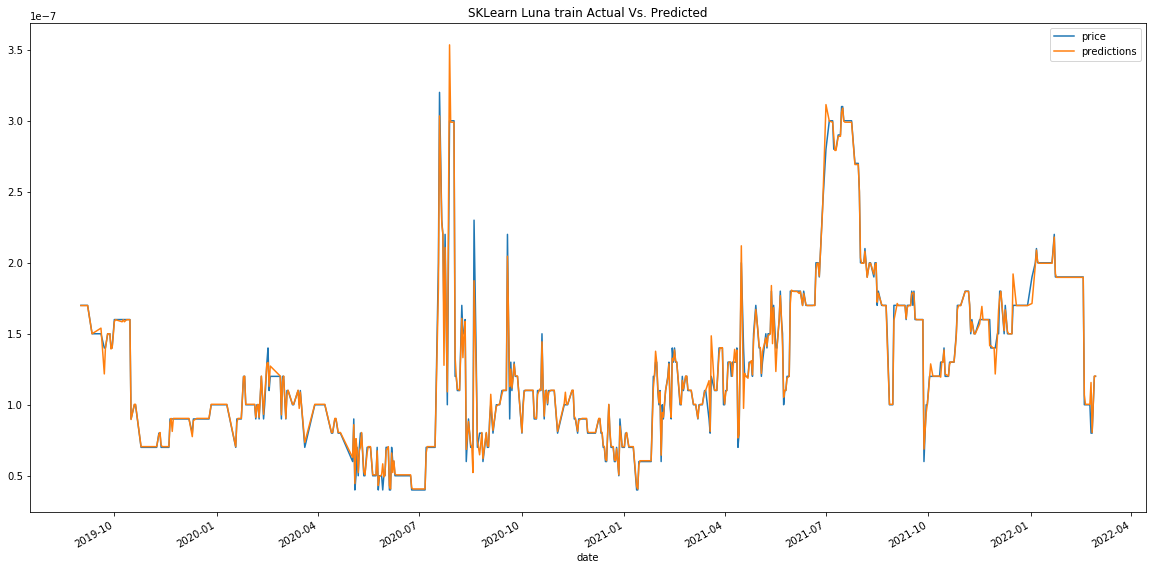

In [389]:
predictions_actual_y_luna_train=y_luna_df_train
predictions_actual_y_luna_train['predictions']=luna_training_prediction_df['prediction'].values

#plot x_test
name = 'SKLearn Luna train Actual Vs. Predicted'
ax = predictions_actual_y_luna_train.plot(figsize=(20,10), title=name)
ax.figure.savefig('luna_train_sklearn.png')

In [390]:
#predict the test values
luna_testing_predictions = model.predict(X_test_scaled)
luna_testing_predictions

array([1.10247783e-07, 1.50715103e-07, 2.98990954e-07, 7.05123789e-08,
       1.00313932e-07, 5.06446767e-08, 1.69850890e-07, 8.04462300e-08,
       7.05123789e-08, 1.00313932e-07, 1.10247783e-07, 1.10247783e-07,
       8.21445537e-08, 1.00313932e-07, 5.01468607e-08, 1.10247783e-07,
       7.74321701e-08, 1.20181634e-07, 1.00313932e-07, 2.98990954e-07,
       2.19520145e-07, 1.18812977e-07, 9.74454345e-08, 1.10247783e-07,
       8.04462300e-08, 1.17398859e-07, 1.59917039e-07, 9.03800811e-08,
       1.79784741e-07, 1.79784741e-07, 1.01412187e-07, 1.69850890e-07,
       1.30115485e-07, 6.05785278e-08, 1.89718592e-07, 1.69850890e-07,
       1.10247783e-07, 2.99224230e-07, 1.89718592e-07, 1.99652443e-07,
       1.89718592e-07, 1.69850890e-07, 1.69850890e-07, 2.27311826e-07,
       4.07108256e-08, 1.69850890e-07, 7.12625452e-08, 4.40623818e-08,
       1.05741626e-07, 1.10247783e-07, 1.00313932e-07, 8.88788028e-08,
       1.89718592e-07, 1.69850890e-07, 1.01144622e-07, 1.10247783e-07,
      

In [391]:
#calculate mean squared error for test
mean_squared_error(y_test, luna_testing_predictions)

2.8583038772205247e-17

In [392]:
#calculate r2 score for test
r2_score(y_test, luna_testing_predictions)

0.9914750146262179

In [393]:
luna_testing_prediction_df = pd.DataFrame(luna_testing_predictions, columns=["prediction"])
luna_testing_prediction_df

,prediction
0,1.102478e-07
1,1.507151e-07
2,2.989910e-07
3,7.051238e-08
4,1.003139e-07
...,...
205,1.599170e-07
206,8.367906e-08
207,1.698509e-07
208,1.003139e-07


In [394]:
y_test=y_test.reset_index()
y_test

,date,price
0,2020-11-06,1.100000e-07
1,2021-11-10,1.500000e-07
2,2021-07-06,3.000000e-07
3,2020-07-12,7.000000e-08
4,2019-10-24,1.000000e-07
...,...,...
205,2021-09-22,1.600000e-07
206,2020-09-28,8.000000e-08
207,2021-12-25,1.700000e-07
208,2020-03-27,1.000000e-07


In [395]:
testing_frames = [luna_testing_prediction_df,y_test]
testing_model_performance=pd.concat(testing_frames)

In [396]:
predictions_actual_y_luna_test['predictions']=luna_testing_prediction_df['prediction'].values

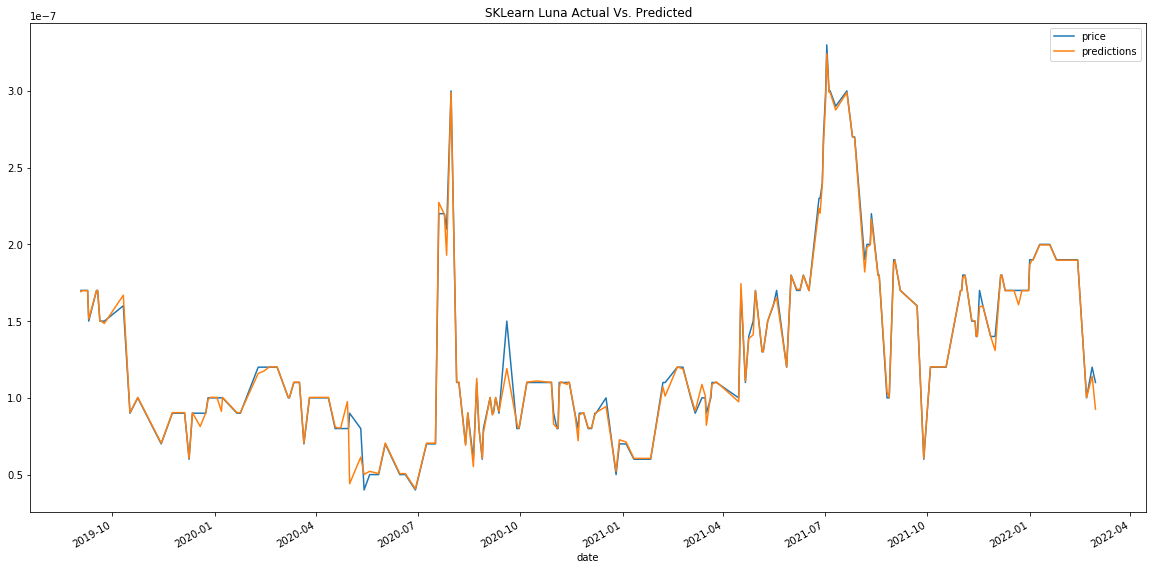

In [397]:
#adjust column names
# predictions_actual_y_luna_test.columns=['prediction', 'actual']

predictions_actual_y_luna_test=y_luna_df
predictions_actual_y_luna_test['predictions']=luna_testing_prediction_df['prediction'].values

#plot x_test
name = 'SKLearn Luna Actual Vs. Predicted'
ax = predictions_actual_y_luna_test.plot(figsize=(20,10), title=name)
ax.figure.savefig('luna_test_sklearn.png')

In [398]:
#set X and y for 'future predictions'

In [399]:
y = luna_df_4_clean["price"]
X = luna_df_4_clean.drop(columns="price")

In [400]:
copy_y_future_luna=y.copy()
y_future_luna_df=pd.DataFrame(copy_y_future_luna)

In [401]:
Luna_df_4_scaled = X_scaler.transform(X)

In [402]:
model = model.fit(Luna_df_4_scaled, y)

Luna_4_df_predictions=model.predict(Luna_df_4_scaled)

In [403]:
mean_squared_error(y, Luna_4_df_predictions)

1.2927942202804768e-16

In [404]:
r2_score(y, Luna_4_df_predictions)

0.9999933517480298

In [405]:
Luna_4_df_predictions_df = pd.DataFrame(Luna_4_df_predictions, columns=["prediction"])
Luna_4_df_predictions_df

,prediction
0,1.358543e-08
1,1.358543e-08
2,1.358543e-08
3,1.358543e-08
4,1.358543e-08
...,...
78,1.138729e-07
79,1.138729e-07
80,1.138729e-07
81,1.138729e-07


In [406]:
y=y.reset_index(drop=True)
y

0     1.000000e-08
1     1.000000e-08
2     1.000000e-08
3     1.000000e-08
4     1.000000e-08
          ...     
78    1.100000e-07
79    1.100000e-07
80    1.100000e-07
81    1.100000e-07
82    1.100000e-07
Name: price, Length: 83, dtype: float64

In [407]:
future_frames = [Luna_4_df_predictions_df,y]
future_model_performance=pd.concat(future_frames)

In [408]:
y_future_luna_df

,price
date,
2022-06-01,1.000000e-08
2022-05-31,1.000000e-08
2022-05-30,1.000000e-08
2022-05-19,1.000000e-08
2022-05-18,1.000000e-08
...,...
2022-03-05,1.100000e-07
2022-03-04,1.100000e-07
2022-03-03,1.100000e-07


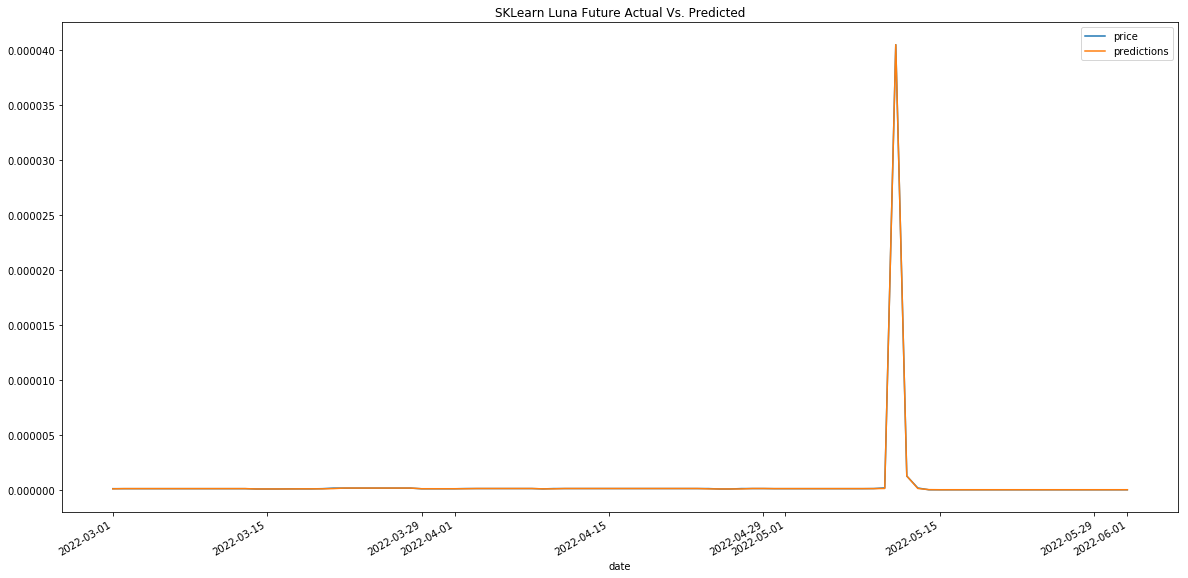

In [410]:
predictions_actual_y_luna_future=y_future_luna_df
predictions_actual_y_luna_future['predictions']=Luna_4_df_predictions_df['prediction'].values

#plot future
name = 'SKLearn Luna Future Actual Vs. Predicted'
ax = predictions_actual_y_luna_future.plot(figsize=(20,10), title=name)
ax.figure.savefig('luna_future_sklearn.png')

In [ ]:
#BTC

In [411]:
#set X and y for sklearn btc_model
y = btc_df_all_clean["price"]
X = btc_df_all_clean.drop(columns="price")

In [412]:
X.isnull().sum()

open    0
high    0
low     0
vol     0
dtype: int64

In [413]:
#separate into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                           
                                                   )
X_train.shape
X_test.shape

(229, 4)

In [414]:
X_train.sort_values("date",ascending=False)
X_test.sort_values("date",ascending=False)


,open,high,low,vol
date,,,,
2022-02-27,39116.6,39838.5,37062.3,66140.0
2022-02-26,39221.6,40094.5,38639.1,41550.0
2022-02-23,38248.2,39194.5,37099.5,64840.0
2022-02-21,38355.0,39444.1,36868.9,91820.0
2022-02-16,44540.9,44552.9,43377.6,41400.0
...,...,...,...,...
2019-09-18,10195.7,10257.5,10119.3,318820.0
2019-09-16,10311.3,10360.5,10108.5,372530.0
2019-09-11,10104.9,10257.5,9908.9,413060.0


In [415]:
copy_y_test_btc=y_test.copy()
y_btc_test_df=pd.DataFrame(copy_y_test_btc)

In [416]:
copy_y_train_btc=y_train.copy()
y_btc_train_df=pd.DataFrame(copy_y_train_btc)

In [417]:
#scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [418]:
X_test_scaled

array([[ 1.09842273e+00,  1.05989034e+00,  1.14293331e+00,
        -3.31873220e-01],
       [-1.12856779e+00, -1.09901284e+00, -1.12689261e+00,
         1.15430577e+00],
       [ 2.03333827e+00,  2.04137140e+00,  1.93449661e+00,
        -2.93807073e-01],
       [ 5.01639512e-01,  4.54057704e-01,  4.23711017e-01,
        -3.00691290e-01],
       [-1.02899873e+00, -9.80603073e-01, -1.01891594e+00,
         1.11371487e+00],
       [-1.00835757e+00, -1.01559075e+00, -1.00049107e+00,
         1.21080638e-01],
       [-9.00113009e-01, -8.86566458e-01, -8.86743594e-01,
        -3.04571780e-01],
       [ 2.17520831e-01,  1.92593358e-01,  2.28974348e-01,
        -3.14695151e-01],
       [-1.00635035e+00, -1.01185806e+00, -1.00279619e+00,
        -2.69917619e-04],
       [ 6.84461278e-01,  7.46641211e-01,  7.01934528e-01,
        -2.81045294e-01],
       [ 1.00834654e+00,  1.04181547e+00,  1.05640329e+00,
        -3.11529061e-01],
       [ 1.52207363e+00,  1.51186271e+00,  1.58788984e+00,
      

In [419]:
X_test.sort_values("date",ascending=True)

,open,high,low,vol
date,,,,
2019-09-04,10611.6,10783.6,10388.6,504450.0
2019-09-09,10402.1,10478.0,10095.7,473760.0
2019-09-11,10104.9,10257.5,9908.9,413060.0
2019-09-16,10311.3,10360.5,10108.5,372530.0
2019-09-18,10195.7,10257.5,10119.3,318820.0
...,...,...,...,...
2022-02-16,44540.9,44552.9,43377.6,41400.0
2022-02-21,38355.0,39444.1,36868.9,91820.0
2022-02-23,38248.2,39194.5,37099.5,64840.0


In [420]:
X_train_scaled

array([[ 0.27827001,  0.26039047,  0.0761362 , -0.1646793 ],
       [-0.85522494, -0.8676213 , -0.85141278,  0.03492239],
       [ 1.54162325,  1.46236181,  1.15377965, -0.17305726],
       ...,
       [-0.88305689, -0.8944695 , -0.87236204, -0.04548818],
       [ 0.27049465,  0.28512583,  0.29875887, -0.31740662],
       [ 0.38464703,  0.40756006,  0.42113849, -0.31473574]])

In [421]:
#set up btc_model to run linear regression
from sklearn.linear_model import LinearRegression

btc_model = LinearRegression()
btc_model = model.fit(X_train_scaled, y_train)
btc_model.predict(X_train_scaled)


array([30446.4112195 , 10980.03899148, 51646.77262849, 55514.06298395,
       47274.84840159, 36407.54628658,  9257.89005887,  9145.86249768,
       42442.28696454,  7545.70347214,  7622.88616775,  9684.67993065,
       60242.53982372, 35040.42373718,  8807.02824671,  8669.20275159,
       61319.15895117, 10630.62358576, 59523.9615665 , 36281.40991718,
        7480.41260003, 46345.85001892, 10266.07267019,  9073.19178536,
       48384.27806819, 62809.5243214 ,  9763.07387671,  9912.40911446,
        6865.83508618,  8754.3278309 , 42729.51521803,  8331.73622862,
       29959.2160626 ,  8760.40687304, 44360.67791265, 18039.3925541 ,
       50515.0195627 ,  7459.5167762 , 56866.08865038, 58103.24269967,
       10734.84200132, 10865.17400062, 23369.74671782,  9139.98232237,
       36107.46979026, 38694.1449005 , 41310.72952722,  8024.2629371 ,
       11440.73335339, 36156.38351382,  9648.03481109,  8129.70677607,
        9434.51483537, 34198.60454268, 10095.82619745, 33842.5417792 ,
      

In [422]:
#predict X_train values
btc_training_predictions = btc_model.predict(X_train_scaled)

In [423]:
#evaluate mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, btc_training_predictions)

321949.2994094856

In [424]:
#evaluate r2 score
from sklearn.metrics import r2_score
r2_score(y_train, btc_training_predictions)

0.9991402832072426

In [425]:
btc_training_prediction_df = pd.DataFrame(btc_training_predictions, columns=["prediction"])
btc_training_prediction_df

,prediction
0,30446.411220
1,10980.038991
2,51646.772628
3,55514.062984
4,47274.848402
...,...
679,8395.656546
680,47674.139678
681,10538.771966
682,33522.783226


In [426]:
y_train=y_train.reset_index(drop=True)
y_train

0      32022.6
1      11096.2
2      54111.8
3      55862.9
4      47123.3
        ...   
679     8439.9
680    46704.5
681    10566.9
682    33797.4
683    36269.5
Name: price, Length: 684, dtype: float64

In [427]:
frames = [btc_training_prediction_df,y_train]
btc_model_performance=pd.concat(frames)

In [428]:
btc_model_performance

,prediction,0
0,30446.411220,NaN
1,10980.038991,NaN
2,51646.772628,NaN
3,55514.062984,NaN
4,47274.848402,NaN
...,...,...
679,NaN,8439.9
680,NaN,46704.5
681,NaN,10566.9
682,NaN,33797.4


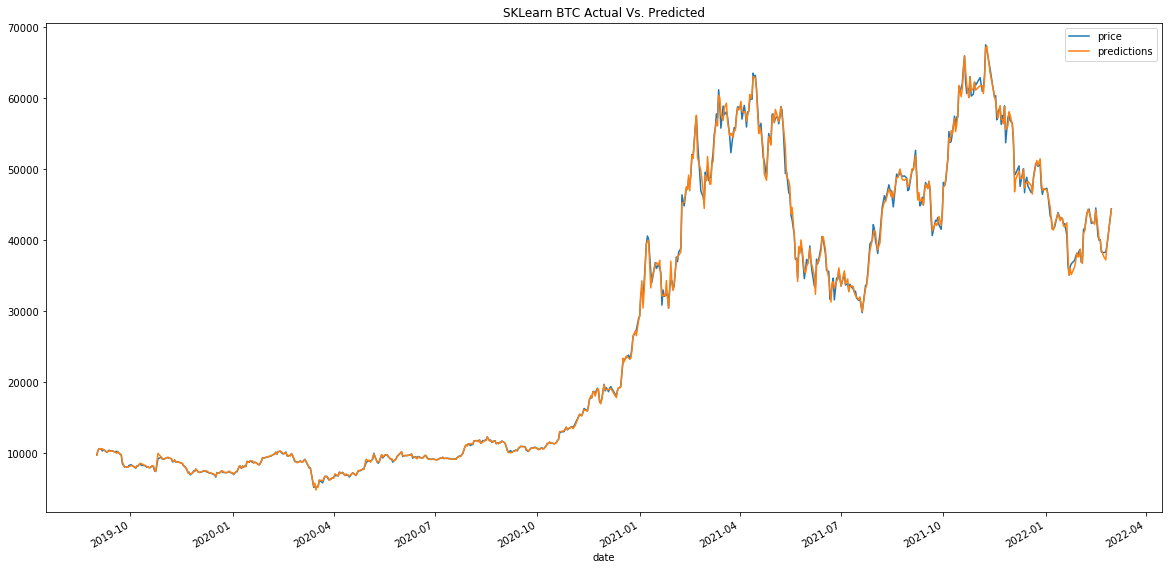

In [429]:
predictions_actual_y_btc_train=y_btc_train_df
predictions_actual_y_btc_train['predictions']=btc_training_prediction_df.values

#plot x_test
name = 'SKLearn BTC Actual Vs. Predicted'
ax = predictions_actual_y_btc_train.plot(figsize=(20,10), title=name)
ax.figure.savefig('btc_train_sklearn.png')

In [430]:
#predict the test values
btc_testing_predictions = btc_model.predict(X_test_scaled)
btc_testing_predictions

array([48763.25699047,  6419.2454953 , 66043.5074312 , 35654.5174807 ,
        8781.4885614 ,  8157.33606465, 10691.2344429 , 31591.95563448,
        8178.56359583, 42263.46591436, 48360.46783372, 57712.24881579,
        9234.85402271,  6886.127191  , 55821.19715542,  7266.21959754,
       46742.92338154,  7501.70069422, 58360.3838418 , 38237.41884316,
       55329.95343003, 42387.76594575,  9635.7630259 ,  5858.84716044,
        8636.46028148, 23059.33939018, 36679.54041226, 59721.17271153,
       18137.69943341, 28720.14439132,  8987.72639454, 55122.54168999,
        9685.49392431,  8555.20607931, 11887.44442773, 38109.41412045,
       13411.27110132, 39486.25553416, 55726.78288689, 15520.75196739,
       13026.81395593, 36042.26247891,  9715.73950034,  6953.5939526 ,
       50404.09487946, 38342.88185469, 14956.51534487, 51271.38968266,
       48340.42181108,  6039.37043509,  9207.4962746 , 11457.59041539,
       13906.04423173,  8853.67601333, 61085.83632698,  7032.88180164,
      

In [431]:
#calculate mean squared error for test
mean_squared_error(y_test, btc_testing_predictions)

270971.1565064623

In [432]:
#calculate r2 score for test
r2_score(y_test, btc_testing_predictions)

0.9992588308421535

In [433]:
btc_testing_prediction_df = pd.DataFrame(btc_testing_predictions, columns=["prediction"])
btc_testing_prediction_df


,prediction
0,48763.256990
1,6419.245495
2,66043.507431
3,35654.517481
4,8781.488561
...,...
224,51210.541654
225,12840.466441
226,48659.021387
227,9406.791480


In [434]:
y_test=y_test.reset_index(drop=True)


In [435]:
testing_frames = [btc_testing_prediction_df,y_test]
testing_btc_model_performance=pd.concat(testing_frames)
testing_btc_model_performance.columns=['prediction','actual']
testing_btc_model_performance

,prediction,actual
0,48763.256990,NaN
1,6419.245495,NaN
2,66043.507431,NaN
3,35654.517481,NaN
4,8781.488561,NaN
...,...,...
224,NaN,51768.6
225,NaN,12934.1
226,NaN,48897.1
227,NaN,9317.2


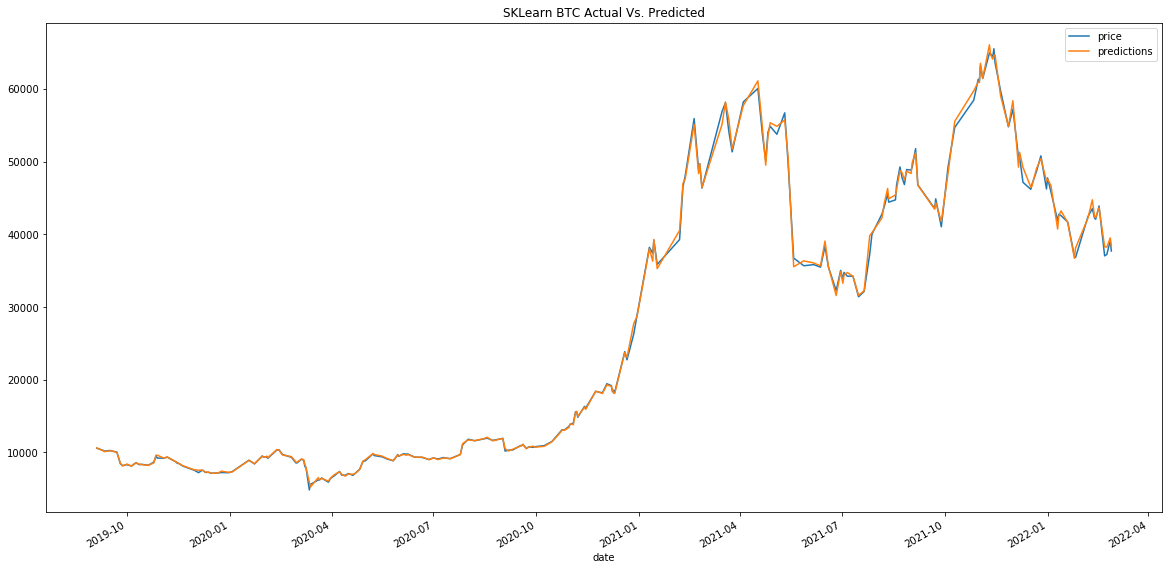

In [436]:
predictions_actual_y_btc_test=y_btc_test_df
predictions_actual_y_btc_test['predictions']=btc_testing_prediction_df.values

#plot x_test
name = 'SKLearn BTC Actual Vs. Predicted'
ax = predictions_actual_y_btc_test.plot(figsize=(20,10), title=name)
ax.figure.savefig('btc_test_sklearn.png')

In [437]:
#set X and y for 'future predictions'

In [438]:
y = btc_df_4_clean["price"]
X = btc_df_4_clean.drop(columns="price")

In [439]:
copy_y_future_btc=y.copy()
y_df_future_btc=pd.DataFrame(copy_y_future_btc)

In [440]:
btc_df_4_scaled = X_scaler.transform(X)

In [441]:
btc_model = btc_model.fit(btc_df_4_scaled, y)

btc_4_df_predictions=btc_model.predict(btc_df_4_scaled)

In [442]:
mean_squared_error(y, btc_4_df_predictions)

171788.2226985277

In [443]:
r2_score(y, btc_4_df_predictions)

0.9945473886866197

In [444]:
btc_4_df_predictions_df = pd.DataFrame(btc_4_df_predictions, columns=["prediction"])
btc_4_df_predictions_df

,prediction
0,29906.619173
1,31908.602347
2,31559.374155
3,29435.470185
4,29162.410008
...,...
88,39150.434493
89,39418.789156
90,42178.069859
91,44134.740614


In [445]:
y=y.reset_index(drop=True)
y

0     29798.5
1     31793.4
2     31723.3
3     29465.2
4     29027.1
       ...   
88    39395.8
89    39142.7
90    42463.0
91    43912.8
92    44420.3
Name: price, Length: 93, dtype: float64

In [446]:
future_frames = [btc_4_df_predictions_df,y]
future_btc_model_performance=pd.concat(future_frames)

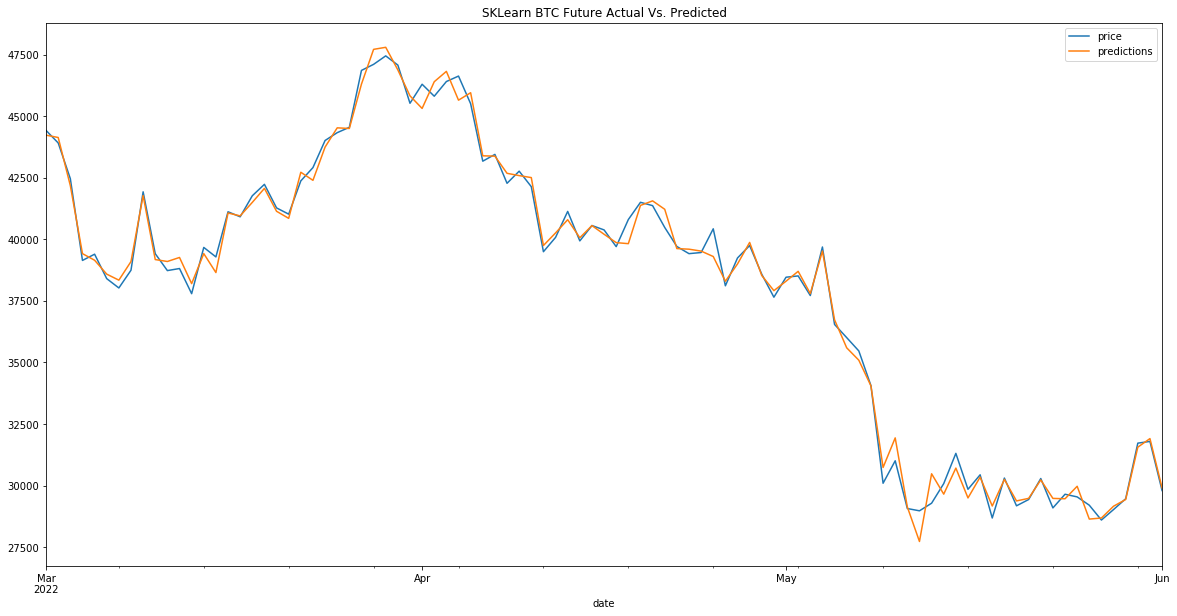

In [447]:
#adjust column names
predictions_actual_y_btc_future=y_df_future_btc
predictions_actual_y_btc_future['predictions']=btc_4_df_predictions_df.values

#plot x_test
name = 'SKLearn BTC Future Actual Vs. Predicted'
ax = predictions_actual_y_btc_future.plot(figsize=(20,10), title=name)
ax.figure.savefig('btc_future_sklearn.png')

In [448]:
##ETH

In [449]:
#set X and y for sklearn eth_model
y = eth_df_all_clean["price"]
X = eth_df_all_clean.drop(columns="price")

In [450]:
X.isnull().sum()

open    0
high    0
low     0
vol     0
dtype: int64

In [451]:
#separate into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    )
X_train.shape
X_test.shape

(227, 4)

In [452]:
X_train.sort_values("date",ascending=False)
X_test.sort_values("date",ascending=False)


,open,high,low,vol
date,,,,
2022-02-27,2779.56,2834.24,2563.00,650220.0
2022-02-26,2768.64,2856.11,2734.80,418490.0
2022-02-23,2641.33,2749.47,2578.09,504190.0
2022-02-21,2621.87,2755.44,2559.61,761630.0
2022-02-16,3184.08,3184.77,3045.72,320000.0
...,...,...,...,...
2019-09-26,169.96,170.96,152.96,637080.0
2019-09-20,220.26,221.47,212.45,523350.0
2019-09-16,188.98,199.23,188.32,515960.0


In [453]:
copy_y_test_eth=y_test.copy()
y_eth_test_df=pd.DataFrame(copy_y_test_eth)
copy_y_train_eth=y_train.copy()
y_eth_train_df=pd.DataFrame(copy_y_train_eth)

In [454]:
#scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [455]:
X_test.sort_values("date",ascending=True)

,open,high,low,vol
date,,,,
2019-09-03,178.05,182.65,175.23,460770.0
2019-09-09,181.16,185.18,176.08,521810.0
2019-09-16,188.98,199.23,188.32,515960.0
2019-09-20,220.26,221.47,212.45,523350.0
2019-09-26,169.96,170.96,152.96,637080.0
...,...,...,...,...
2022-02-16,3184.08,3184.77,3045.72,320000.0
2022-02-21,2621.87,2755.44,2559.61,761630.0
2022-02-23,2641.33,2749.47,2578.09,504190.0


In [456]:
X_train_scaled

array([[ 0.23595535,  0.19762307,  0.08247519, -0.78321822],
       [-0.74694826, -0.75604046, -0.74313099, -0.28863132],
       [ 1.54560489,  1.56342891,  1.60554745, -0.48029808],
       ...,
       [ 1.77872312,  1.7396389 ,  1.82730529, -0.33583436],
       [ 0.47364147,  0.4788428 ,  0.47813432, -0.98979522],
       [ 0.68536271,  0.7257728 ,  0.71582725,  0.36374931]])

In [457]:
#set up eth_model to run linear regression
from sklearn.linear_model import LinearRegression

eth_model = LinearRegression()
eth_model = eth_model.fit(X_train_scaled, y_train)
eth_model.predict(X_train_scaled)


array([1573.43925495,  382.33227947, 3719.60509462,  172.38787582,
        446.62442497,  220.3969705 , 2961.62469652,  517.56920455,
        260.42884762,  227.79167907, 3781.10679018, 2563.67611642,
       1482.04335239,  176.12674219, 3757.29089367,  367.24622259,
       4179.90445629,  240.65663452,  187.0771633 , 3727.96969211,
        229.91239992,  408.55826283,  280.53822029, 2335.13279343,
        203.49957992,  394.56872503,  182.97345762, 4121.4469745 ,
        122.58982828, 1812.84310775, 3291.88048758,  161.35159933,
       1759.50001212,  186.14005496, 2976.5252157 ,  593.03279588,
       4102.26065244,  612.32336142, 1678.20107615,  274.68391799,
        325.2152409 ,  364.56185558, 1747.79168667,  195.44517543,
       2152.95677636, 2428.50046588, 2855.48797764,  196.10435185,
        389.55594919,  171.44641258,  178.57855162,  142.65538862,
        235.57200315, 1964.43932736,  218.21656578, 2220.40984011,
        374.96432111, 4421.3926842 , 4603.85454163,  212.96109

In [458]:
#predict X_train values
eth_training_predictions = eth_model.predict(X_train_scaled)

In [459]:
#evaluate mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, eth_training_predictions)

1530.8747891472558

In [460]:
#evaluate r2 score
from sklearn.metrics import r2_score
r2_score(y_train, eth_training_predictions)

0.9992360098809246

In [461]:
eth_training_prediction_df = pd.DataFrame(eth_training_predictions, columns=["prediction"])
eth_training_prediction_df

,prediction
0,1573.439255
1,382.332279
2,3719.605095
3,172.387876
4,446.624425
...,...
676,191.652571
677,168.638915
678,3958.670756
679,2129.036526


In [462]:
y_train=y_train.reset_index(drop=True)
y_train

0      1577.89
1       382.40
2      3709.42
3       170.01
4       444.14
        ...   
676     194.55
677     166.97
678    3925.80
679    2146.33
680    2540.45
Name: price, Length: 681, dtype: float64

In [463]:
frames = [eth_training_prediction_df,y_train]
eth_model_performance=pd.concat(frames)

In [464]:
eth_model_performance

,prediction,0
0,1573.439255,NaN
1,382.332279,NaN
2,3719.605095,NaN
3,172.387876,NaN
4,446.624425,NaN
...,...,...
676,NaN,194.55
677,NaN,166.97
678,NaN,3925.80
679,NaN,2146.33


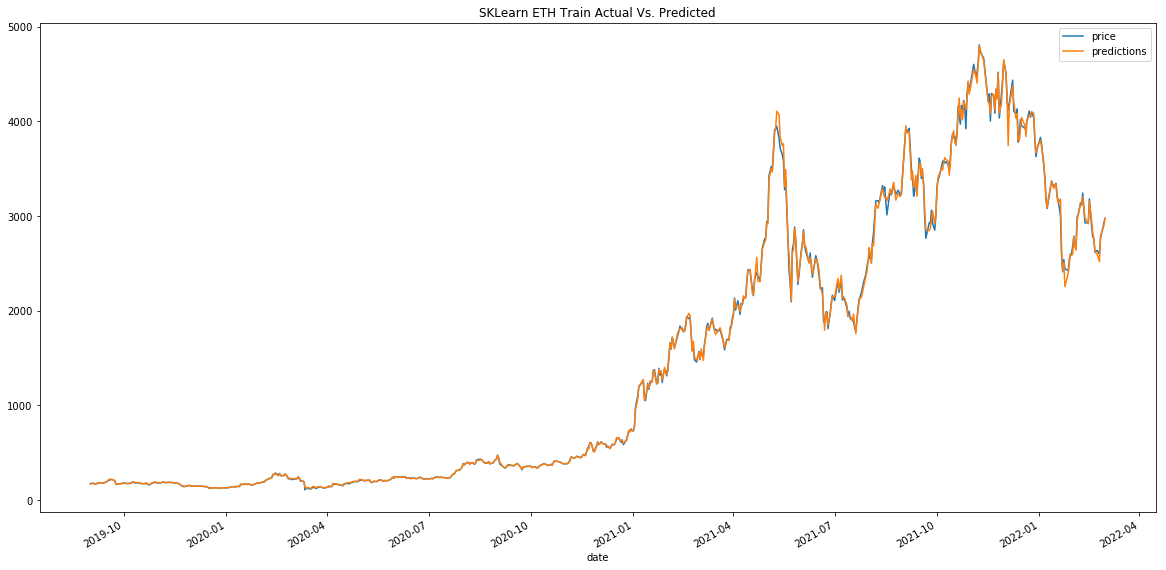

In [465]:
predictions_actual_y_eth_train=y_eth_train_df
predictions_actual_y_eth_train['predictions']=eth_training_prediction_df.values

#plot x_test
name = 'SKLearn ETH Train Actual Vs. Predicted'
ax = predictions_actual_y_eth_train.plot(figsize=(20,10), title=name)
ax.figure.savefig('eth_train_sklearn.png')

In [466]:
#predict the test values
eth_testing_predictions = eth_model.predict(X_test_scaled)
eth_testing_predictions

array([ 160.43375277, 2189.76035429,  192.12551274, 3465.86620335,
        206.04193576, 2730.87317293, 2675.82312787,  394.40575055,
        176.22376542,  238.2303114 ,  389.07506821, 3783.92861966,
       2699.36180438, 1800.61617291,  148.33479972,  246.61359817,
       3111.39227418, 2690.17978187, 1691.60471631, 2922.0452964 ,
        186.92258676, 1703.98012167,  149.39745467,  253.69302657,
        439.05252679, 1789.45586616,  171.52521401, 4022.84750831,
        135.07741402, 2429.00914931,  182.50819569,  137.4619949 ,
       4455.74443479,  111.1258854 , 2662.96007617, 1811.44354208,
       2818.64314709, 2312.95151089,  315.48291922,  227.04436578,
       1032.52042368, 1770.53561723,  199.73583639,  167.95457946,
       2664.27370178, 2244.90003135, 1668.32015609,  623.51158203,
       1448.49149773, 2219.7961596 ,  208.32684632,  163.11144193,
        117.46729365,  266.24799733,  213.29037363,  207.85945594,
       1375.74599765, 3072.28318235, 4153.57166732, 2716.82021

In [467]:
#calculate mean squared error for test
mean_squared_error(y_test, eth_testing_predictions)

1922.9309345181182

In [468]:
#calculate r2 score for test
r2_score(y_test, eth_testing_predictions)

0.9991097135183931

In [469]:
eth_testing_prediction_df = pd.DataFrame(eth_testing_predictions, columns=["prediction"])
eth_testing_prediction_df

,prediction
0,160.433753
1,2189.760354
2,192.125513
3,3465.866203
4,206.041936
...,...
222,3228.047135
223,405.888365
224,4082.564398
225,152.248321


In [470]:
y_test=y_test.reset_index(drop=True)
y_test

0       157.83
1      2165.40
2       191.15
3      3414.72
4       199.67
        ...   
222    3244.01
223     406.01
224    4072.79
225     150.74
226     612.60
Name: price, Length: 227, dtype: float64

In [471]:
testing_frames = [eth_testing_prediction_df, y_test]
testing_eth_model_performance=pd.concat(testing_frames)
testing_eth_model_performance

,prediction,0
0,160.433753,NaN
1,2189.760354,NaN
2,192.125513,NaN
3,3465.866203,NaN
4,206.041936,NaN
...,...,...
222,NaN,3244.01
223,NaN,406.01
224,NaN,4072.79
225,NaN,150.74


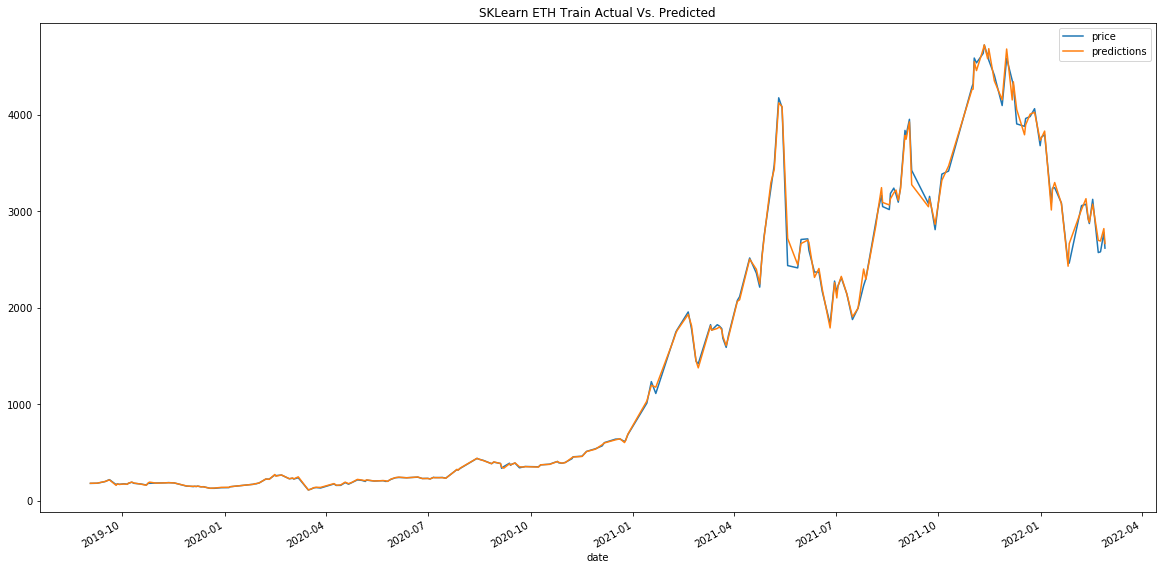

In [472]:
predictions_actual_y_eth_test=y_eth_test_df
predictions_actual_y_eth_test['predictions']=eth_testing_prediction_df.values

#plot x_test
name = 'SKLearn ETH Train Actual Vs. Predicted'
ax = predictions_actual_y_eth_test.plot(figsize=(20,10), title=name)
ax.figure.savefig('eth_test_sklearn.png')

In [473]:
#set X and y for 'future predictions'

In [474]:
y = eth_df_4_clean["price"]
X = eth_df_4_clean.drop(columns="price")

In [475]:
copy_y_future_eth=y.copy()
y_df_future_eth=pd.DataFrame(copy_y_future_eth)

In [476]:
eth_df_4_scaled = X_scaler.transform(X)

In [477]:
eth_model = eth_model.fit(eth_df_4_scaled, y)

eth_4_df_predictions=eth_model.predict(eth_df_4_scaled)

In [478]:
mean_squared_error(y, eth_4_df_predictions)

1187.1230732322622

In [479]:
r2_score(y, eth_4_df_predictions)

0.9950218434689616

In [480]:
eth_4_df_predictions_df = pd.DataFrame(eth_4_df_predictions, columns=["prediction"])
eth_4_df_predictions_df

,prediction
0,1816.940366
1,1954.964247
2,1965.894824
3,1800.122485
4,1793.647771
...,...
88,2651.822850
89,2610.747337
90,2823.041782
91,2975.249003


In [481]:
y=y.reset_index(drop=True)
y

0     1817.65
1     1941.78
2     1998.30
3     1813.52
4     1792.22
       ...   
88    2665.42
89    2622.15
90    2834.85
91    2946.73
92    2975.66
Name: price, Length: 93, dtype: float64

In [487]:
future_frames = [eth_4_df_predictions_df,y]
future_eth_model_performance=pd.concat(future_frames)

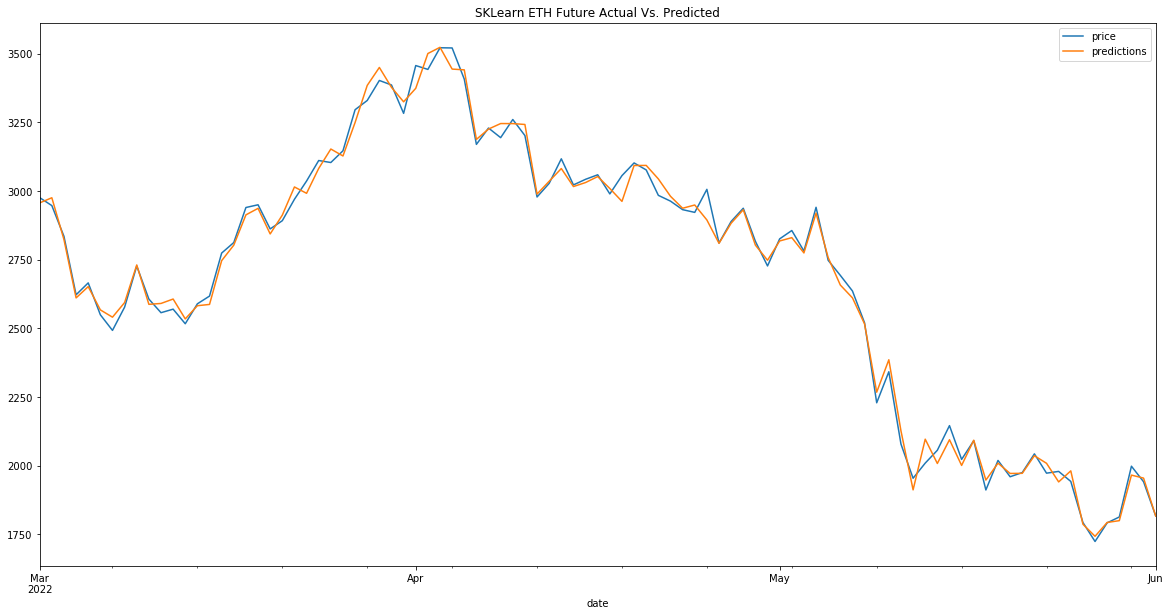

In [488]:
#adjust column names
predictions_actual_y_eth_future=y_df_future_eth
predictions_actual_y_eth_future['predictions']=eth_4_df_predictions_df.values

#plot x_test
name = 'SKLearn ETH Future Actual Vs. Predicted'
ax = predictions_actual_y_eth_future.plot(figsize=(20,10), title=name)
ax.figure.savefig('eth_future_sklearn.png')

In [484]:
#Begin tensorflow.keras

In [ ]:
from sklearn.cluster import KMeans
# Create a a list to store inertia values
inertia = []

# Create a a list to store the values of k
k = list(range(1, 11))

In [ ]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(X)
    inertia.append(k_model.inertia_)

In [ ]:
# Create a Dictionary that holds the list values for k and inertia
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame using the elbow_data Dictionary
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

In [ ]:
 # Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

In [ ]:
# Define the model with the lower value of k clusters
# Use a random_state of 1 to generate the model
model_k_luna = KMeans(n_clusters=3, random_state=1)

# Fit the model
model_k_luna.fit(luna_df_all_clean)

# Make predictions
luna_lower = model_k_luna.predict(luna_df_all_clean)

# Create a copy of the DataFrame and name it 
luna_df_predictions = luna_lower.copy()

# Add a class column with the labels to the DataFrame
luna_df_predictions['clusters_lower'] = luna_df_predictions

luna_df_predictions.head()

In [ ]:
###Keras

In [ ]:
#from sklearn.datasets import make_blobs, make_moons
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#set random seed for Tensorflow
import tensorflow as tf
#tf.random.set_seed(30)
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [ ]:
# This function accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [ ]:
#LSTM BTC

In [ ]:
# Predict Prices using a 10 day window of previous closing prices
window_size = 10

# Column index 0 is the '' column
# Column index 1 is the `` column
feature_column = 1
target_column = 1
X, y = window_data(btc_df_all_clean, window_size, feature_column, target_column)

In [ ]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
scaler = MinMaxScaler().fit(X_train)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [ ]:
# Reshape 
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
model_lstm_btc = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model_lstm_btc.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model_lstm_btc.add(Dropout(dropout_fraction))

# Layer 2
model_lstm_btc.add(LSTM(units=number_units, return_sequences=True))
model_lstm_btc.add(Dropout(dropout_fraction))

# Layer 3
model_lstm_btc.add(LSTM(units=number_units))
model_lstm_btc.add(Dropout(dropout_fraction))

# Output layer
model_lstm_btc.add(Dense(1))

In [ ]:
model_lstm_btc.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
model_lstm_btc.summary()

In [ ]:
model_lstm_btc.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=90, verbose=1)

In [ ]:
model_lstm_btc.evaluate(X_test, y_test, verbose=0)

In [ ]:
predicted = model_lstm_btc.predict(X_test)

In [ ]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Create a DataFrame of Real and Predicted values
btc_r_p = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = btc_df_all_clean.index[-len(real_prices): ]) 
btc_r_p.head()

In [ ]:
name = 'Bitcoin Actual Vs. Predicted'
ax = btc_r_p.plot(figsize=(20,10), title=name)
ax.figure.savefig('bitcoin.png')

In [ ]:

# Predict Prices using a 10 day window of previous closing prices
window_size = 10

# Column index 0 is the '' column
# Column index 1 is the `` column
feature_column = 1
target_column = 1
X, y = window_data(eth_df_all_clean, window_size, feature_column, target_column)

In [ ]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [ ]:
scaler = MinMaxScaler().fit(X_train)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [ ]:
# Reshape 
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

In [ ]:
model_lstm_eth = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model_lstm_eth.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model_lstm_eth.add(Dropout(dropout_fraction))

# Layer 2
model_lstm_eth.add(LSTM(units=number_units, return_sequences=True))
model_lstm_eth.add(Dropout(dropout_fraction))

# Layer 3
model_lstm_eth.add(LSTM(units=number_units))
model_lstm_eth.add(Dropout(dropout_fraction))

# Output layer
model_lstm_eth.add(Dense(1))

In [ ]:
model_lstm_eth.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
model_lstm_eth.summary()

In [ ]:
model_lstm_eth.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=90, verbose=1)

In [ ]:
predicted_eth = model_lstm_eth.predict(X_test)

In [ ]:
# Recover the original prices instead of the scaled version
predicted_prices_eth = scaler.inverse_transform(predicted_eth)
real_prices_eth = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Create a DataFrame of Real and Predicted values
eth_r_p = pd.DataFrame({
    "Real_eth": real_prices_eth.ravel(),
    "Predicted_eth": predicted_prices_eth.ravel()
}, index = eth_df_all_clean.index[-len(real_prices_eth): ]) 
display(eth_r_p.head())
display(eth_r_p.tail())

In [ ]:
name = 'Ethereum Actual Vs. Predicted'
ax = eth_r_p.plot(figsize=(20,10), title=name)
ax.figure.savefig('ethereum.png')

In [ ]:
#LSTM LUNA

In [ ]:
# Predict Prices using a 10 day window of previous closing prices
window_size = 10

# Column index 0 is the '' column
# Column index 1 is the `` column
feature_column = 1
target_column = 1
X, y = window_data(luna_df_all_clean, window_size, feature_column, target_column)

In [ ]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [ ]:
scaler = MinMaxScaler().fit(X_train)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [ ]:
# Reshape 
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

In [ ]:
model_lstm_luna = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model_lstm_luna.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model_lstm_luna.add(Dropout(dropout_fraction))

# Layer 2
model_lstm_luna.add(LSTM(units=number_units, return_sequences=True))
model_lstm_luna.add(Dropout(dropout_fraction))

# Layer 3
model_lstm_luna.add(LSTM(units=number_units))
model_lstm_luna.add(Dropout(dropout_fraction))

# Output layer
model_lstm_luna.add(Dense(1))

In [ ]:
model_lstm_luna.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
model_lstm_luna.summary()

In [ ]:
model_lstm_luna.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=90, verbose=1)

In [ ]:
predicted_luna = model_lstm_luna.predict(X_test)

In [ ]:
# Recover the original prices instead of the scaled version
predicted_prices_luna = scaler.inverse_transform(predicted_luna)
real_prices_luna = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Create a DataFrame of Real and Predicted values
luna_r_p = pd.DataFrame({
    "Real_Luna": real_prices_luna.ravel(),
    "Predicted_Luna": predicted_prices_luna.ravel()
}, index = luna_df_all_clean.index[-len(real_prices_luna): ]) 
display(luna_r_p.head())
display(luna_r_p.tail())

In [ ]:
name = 'Luna Actual Vs. Predicted'
ax = luna_r_p.plot(figsize=(20,10), title=name)
ax.figure.savefig('luna.png')